In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN Assignment/Skin cancer/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/CNN Assignment/Skin cancer/Test")

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2259
118


In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2259 files belonging to 9 classes.
Using 1808 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2259 files belonging to 9 classes.
Using 451 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualising the Data

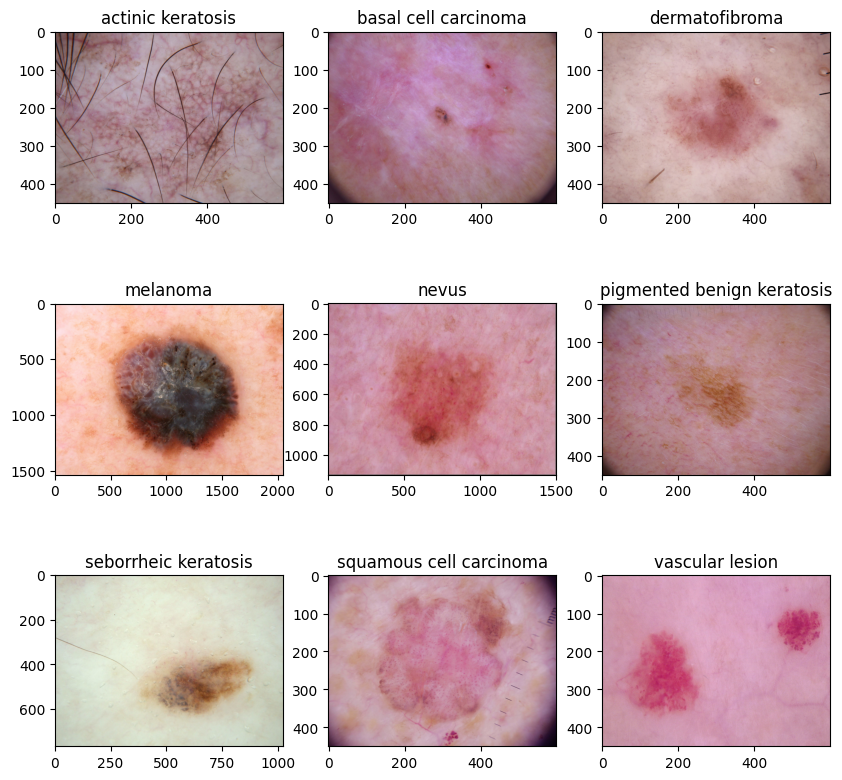

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Create the Model

In [16]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

Train the model

In [20]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 182s 3s/step - loss: 2.0465 - accuracy: 0.2091 - val_loss: 1.9660 - val_accuracy: 0.2683
Epoch 2/20
57/57 [==============================] - 5s 93ms/step - loss: 1.8148 - accuracy: 0.3357 - val_loss: 1.6962 - val_accuracy: 0.3969
Epoch 3/20
57/57 [==============================] - 5s 91ms/step - loss: 1.7345 - accuracy: 0.3645 - val_loss: 1.9065 - val_accuracy: 0.3614
Epoch 4/20
57/57 [==============================] - 5s 91ms/step - loss: 1.6858 - accuracy: 0.3789 - val_loss: 1.5810 - val_accuracy: 0.4058
Epoch 5/20
57/57 [==============================] - 5s 90ms/step - loss: 1.5815 - accuracy: 0.4270 - val_loss: 1.5375 - val_accuracy: 0.4701
Epoch 6/20
57/57 [==============================] - 5s 89ms/step - loss: 1.6016 - accuracy: 0.4220 - val_loss: 1.6453 - val_accuracy: 0.4035
Epoch 7/20
57/57 [==============================] - 5s 89ms/step - loss: 1.5628 - accuracy: 0.4508 - val_loss: 1.5114 - val_accuracy: 0.4612
Epoch 8/20
57

### Visualising the Results

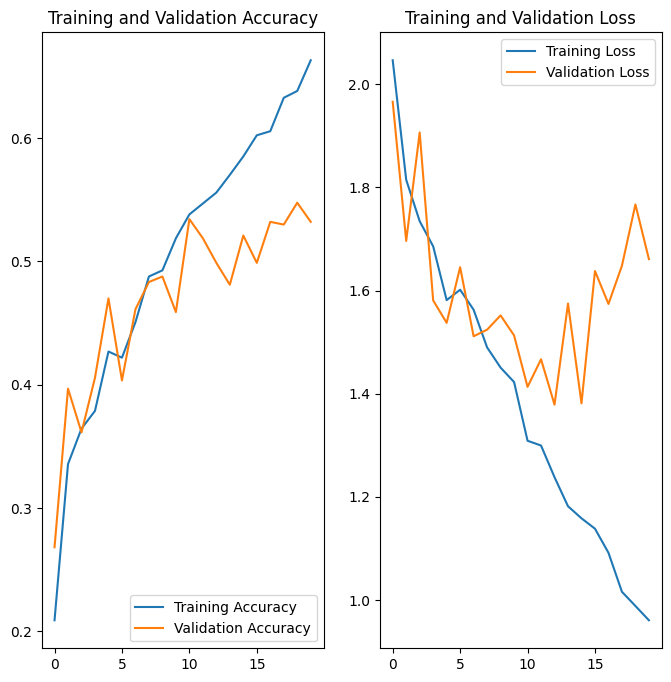

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings from First Model

The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

The accuracy is just around 75-80% because there are enough features to remember the pattern.


In [22]:
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


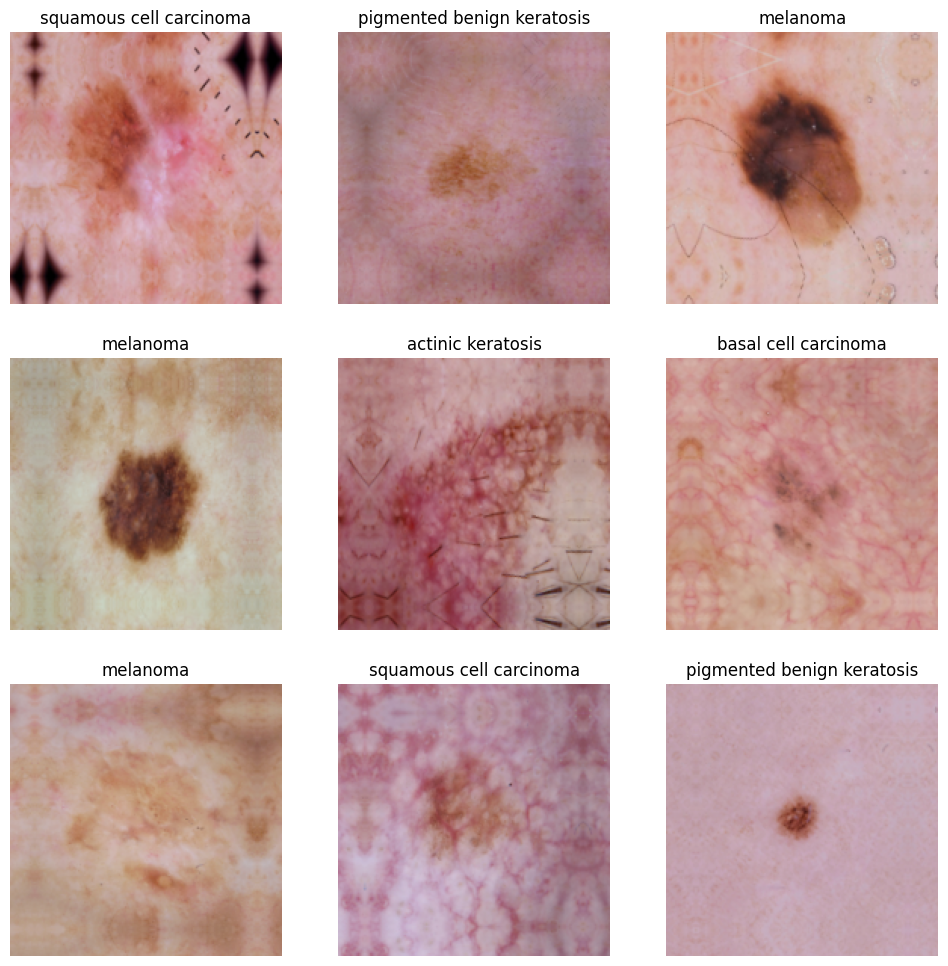

In [23]:
# visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Create the model, compile and train the model

In [24]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model


In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 6s 103ms/step - loss: 2.0249 - accuracy: 0.2030 - val_loss: 2.0311 - val_accuracy: 0.1973
Epoch 2/20
57/57 [==============================] - 6s 104ms/step - loss: 2.2441 - accuracy: 0.2069 - val_loss: 2.0489 - val_accuracy: 0.1973
Epoch 3/20
57/57 [==============================] - 6s 104ms/step - loss: 2.0317 - accuracy: 0.2063 - val_loss: 2.0336 - val_accuracy: 0.1973
Epoch 4/20
57/57 [==============================] - 6s 103ms/step - loss: 2.0262 - accuracy: 0.2069 - val_loss: 2.0314 - val_accuracy: 0.1973
Epoch 5/20
57/57 [==============================] - 6s 102ms/step - loss: 2.0224 - accuracy: 0.2063 - val_loss: 2.0298 - val_accuracy: 0.1973
Epoch 6/20
57/57 [==============================] - 6s 102ms/step - loss: 2.0243 - accuracy: 0.2002 - val_loss: 2.0318 - val_accuracy: 0.1818
Epoch 7/20
57/57 [==============================] - 6s 102ms/step - loss: 2.0240 - accuracy: 0.2080 - val_loss: 2.0297 - val_accuracy: 0.1796
Epoch 

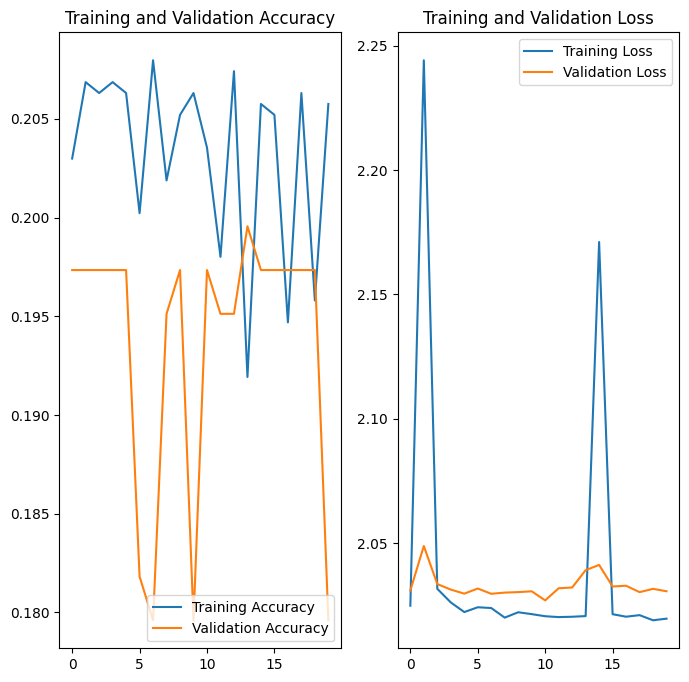

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Finding the distribution of classes in the training dataset.

In [31]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df


,Path,Label
0,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
1,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
2,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
3,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
4,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
...,...,...
2254,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion
2255,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion
2256,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion
2257,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion


In [32]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
1,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
2,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
3,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
4,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
...,...,...
2254,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion
2255,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion
2256,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion
2257,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion


<BarContainer object of 9 artists>

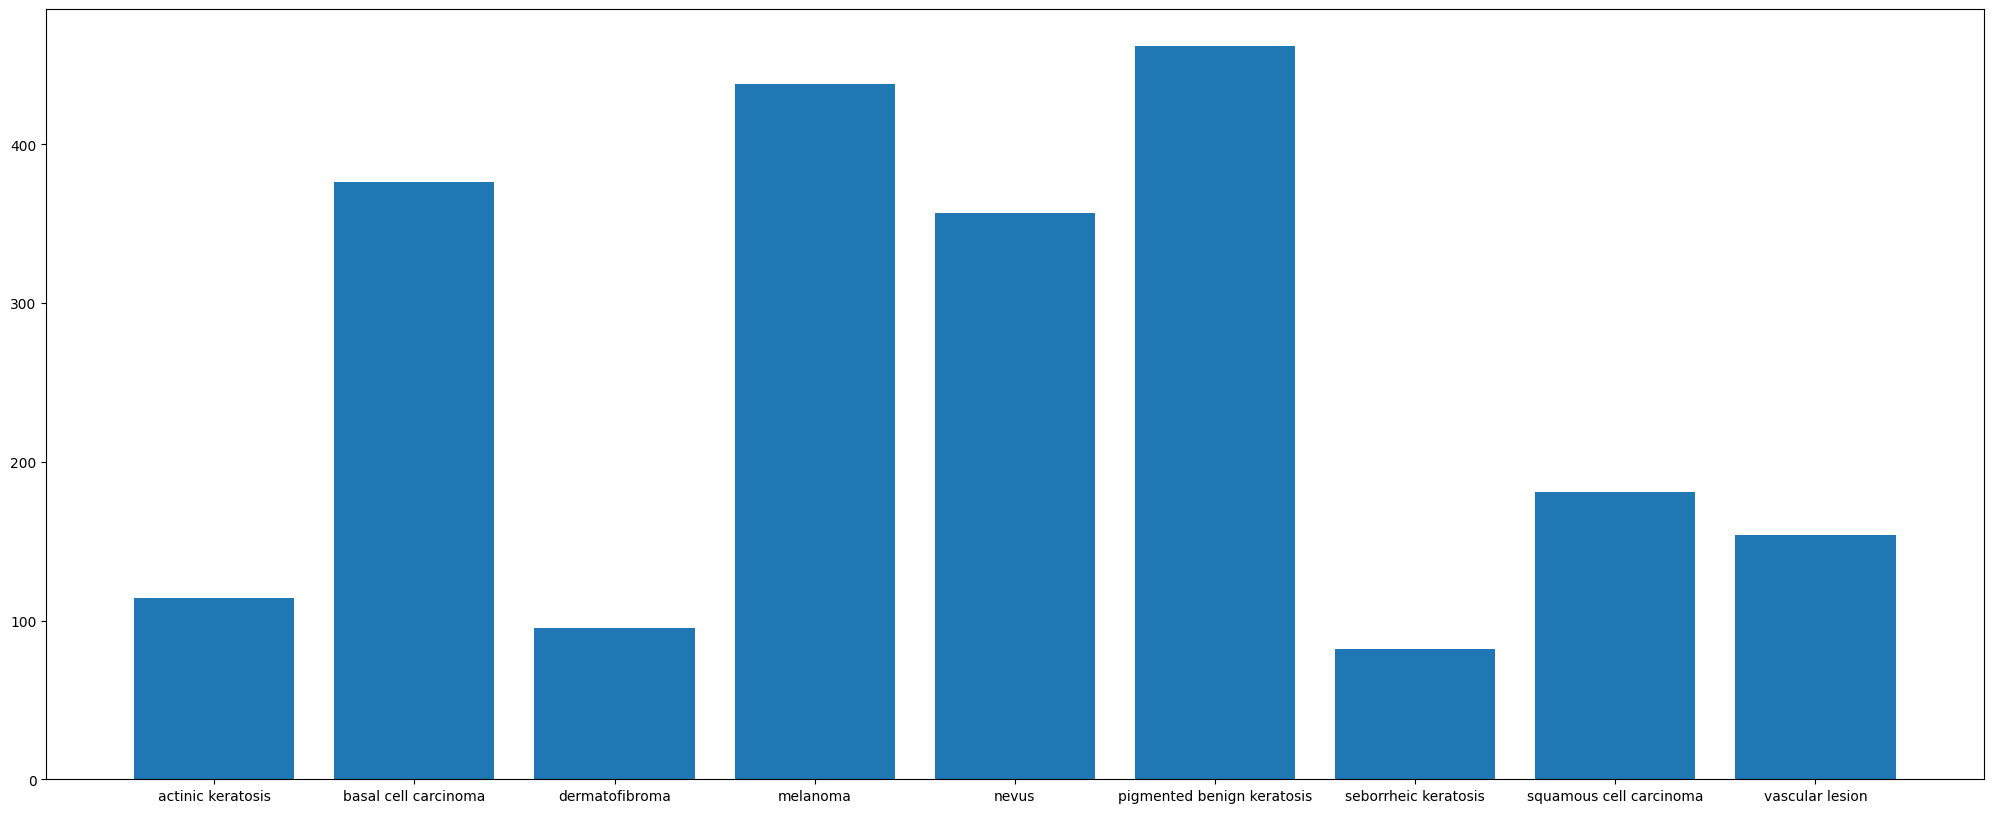

In [33]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

The class that have least number of samples is seborrheic keratosis.

### Rectifying the class imbalance using Augmentor

In [34]:
!pip install Augmentor

In [37]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/CNN Assignment/Skin cancer/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 2259 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AA1E058A9E0>: 100%|██████████| 500/500 [00:41<00:00, 11.91 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AA0041053F0>: 100%|██████████| 500/500 [00:58<00:00,  8.50 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7AA1F3FD4BB0>: 100%|██████████| 500/500 [00:43<00:00, 11.43 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7AA0044CF790>: 100%|██████████| 500/500 [00:45<00:00, 10.97 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AA1E06AA4D0>: 100%|██████████| 500/500 [00:44<00:00, 11.17 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AA1F3FD5AE0>: 100%|██████████| 500/500 [00:40<00:00, 12.32 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7AA1E05E6F80>: 100%|██████████| 500/500 [00:42<00:00, 11.68 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7AA0042D63B0>: 100%|██████████| 500/500 [00:41<00:00, 11.97 Samples/s]


Initialised with 2259 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7A9EF87C2170>: 100%|██████████| 500/500 [01:00<00:00,  8.27 Samples/s]


In [38]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/CNN Assignment/Skin cancer/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [39]:
for i in class_names:

    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
1,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
2,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
3,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
4,/content/drive/MyDrive/CNN Assignment/Skin can...,actinic keratosis
...,...,...
6754,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion
6755,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion
6756,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion
6757,/content/drive/MyDrive/CNN Assignment/Skin can...,vascular lesion


In [40]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1350
melanoma                      1302
basal cell carcinoma          1150
nevus                         1080
squamous cell carcinoma        531
vascular lesion                478
actinic keratosis              332
dermatofibroma                 293
seborrheic keratosis           243
Name: count, dtype: int64

### Train the model on the data created using Augmentor


In [41]:
batch_size = 32
img_height = 180
img_width = 180

In [42]:
import pathlib
data_dir_train1=pathlib.Path("/content/drive/MyDrive/CNN Assignment/Skin cancer/Train")

In [43]:
data_dir_train1

PosixPath('/content/drive/MyDrive/CNN Assignment/Skin cancer/Train')

Create a training dataset

In [44]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2259


In [46]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/MyDrive/CNN Assignment/Skin cancer/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6759 files belonging to 10 classes.
Using 5408 files for training.


Create a validation dataset

In [ ]:
-